# RESTAURANT DATA WITH CONSUMER RATINGS

# Step 1 - Load Data

In [19]:
#Import the necessary libraries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path where the extracted files are located
data_folder = "C:/Users/v-femuku/Documents/TBL-DataAnalytics-Course/Project/orignal_data"  # Update this with your actual path
 
# Load CSV files into dataframes
file_paths = {
    "chefmozaccepts": "C:/Users/v-femuku/Documents/TBL-DataAnalytics-Course/Project/orignal_data/chefmozaccepts.csv",
    "chefmozcuisine": "C:/Users/v-femuku/Documents/TBL-DataAnalytics-Course/Project/orignal_data/chefmozcuisine.csv",
    "chefmozhours4": "C:/Users/v-femuku/Documents/TBL-DataAnalytics-Course/Project/orignal_data/chefmozhours4.csv",
    "chefmozparking": "C:/Users/v-femuku/Documents/TBL-DataAnalytics-Course/Project/orignal_data/chefmozparking.csv",
    "geoplaces2": "C:/Users/v-femuku/Documents/TBL-DataAnalytics-Course/Project/orignal_data/geoplaces2.csv",
    "rating_final": "C:/Users/v-femuku/Documents/TBL-DataAnalytics-Course/Project/orignal_data/rating_final.csv",
    "usercuisine": "C:/Users/v-femuku/Documents/TBL-DataAnalytics-Course/Project/orignal_data/usercuisine.csv",
    "userpayment": "C:/Users/v-femuku/Documents/TBL-DataAnalytics-Course/Project/orignal_data/userpayment.csv",
    "userprofile": "C:/Users/v-femuku/Documents/TBL-DataAnalytics-Course/Project/orignal_data/userprofile.csv",
}

dfs = {name: pd.read_csv(path, na_values='?') for name, path in file_paths.items()}

# Display basic information about each dataframe
for name, df in dfs.items():
    print(f"--- {name} ---")
    print(df.info())
    print(df.head(), '\n')

--- chefmozaccepts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   1314 non-null   int64 
 1   Rpayment  1314 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.7+ KB
None
   placeID             Rpayment
0   135110                 cash
1   135110                 VISA
2   135110  MasterCard-Eurocard
3   135110     American_Express
4   135110     bank_debit_cards 

--- chefmozcuisine ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   916 non-null    int64 
 1   Rcuisine  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB
None
   placeID        Rcuisine
0   135110         Spanish
1   135109         Italian
2   135107  Latin_American
3   135106         Mexican

# Step 2 - Cleaning Data

# Handling Missing Values

In [24]:
geoplaces2 = dfs['geoplaces2']

# Drop the "fax" column only if it exists
if 'fax' in geoplaces2.columns:
    geoplaces2 = geoplaces2.drop('fax', axis=1)

# Fill missing values for categorical data with 'Unknown' and for numerical data with median
geoplaces2.fillna({
    'address': 'Unknown', 'city': 'Unknown', 'state': 'Unknown', 
    'country': 'Unknown', 'zip': 'Unknown', 'url': 'Unknown'
}, inplace=True)

# For numeric fields, fill missing values with the median
numeric_cols = geoplaces2.select_dtypes(include=['float64', 'int64']).columns
geoplaces2[numeric_cols] = geoplaces2[numeric_cols].apply(lambda x: x.fillna(x.median()))

dfs['geoplaces2'] = geoplaces2

# Handle missing values in other dataframes similarly
rating_data = dfs['rating_final']
rating_data.fillna({
    'Rpayment': 'Unknown', 'Rcuisine_x': 'Unknown', 
    'hours': 'Unknown', 'days': 'Unknown', 'Upayment': 'Unknown'
}, inplace=True)

print("Processed Geoplaces2 Data:")
print(geoplaces2.head())

print("\nProcessed Rating Data:")
print(rating_data.head())


Processed Geoplaces2 Data:
   placeID   latitude   longitude  \
0   134999  18.915421  -99.184871   
1   132825  22.147392 -100.983092   
2   135106  22.149709 -100.976093   
3   132667  23.752697  -99.163359   
4   132613  23.752903  -99.165076   

                                      the_geom_meter  \
0  0101000020957F000088568DE356715AC138C0A525FC46...   
1  0101000020957F00001AD016568C4858C1243261274BA5...   
2  0101000020957F0000649D6F21634858C119AE9BF528A3...   
3  0101000020957F00005D67BCDDED8157C1222A2DC8D84D...   
4  0101000020957F00008EBA2D06DC8157C194E03B7B504E...   

                             name                                 address  \
0                 Kiku Cuernavaca                              Revolucion   
1                 puesto de tacos  esquina santos degollado y leon guzman   
2      El Rinc�n de San Francisco                         Universidad 169   
3  little pizza Emilio Portes Gil                 calle emilio portes gil   
4                   carnitas

# Handling Outliers

In [25]:
# Handle outliers for geoplaces2 data
geoplaces2 = dfs['geoplaces2']
geoplaces2['latitude'] = geoplaces2['latitude'].clip(lower=geoplaces2['latitude'].quantile(0.01), upper=geoplaces2['latitude'].quantile(0.99))
geoplaces2['longitude'] = geoplaces2['longitude'].clip(lower=geoplaces2['longitude'].quantile(0.01), upper=geoplaces2['longitude'].quantile(0.99))

dfs['geoplaces2'] = geoplaces2

# Handle outliers for rating data
rating_data = dfs['rating_final']
rating_data['food_rating'] = rating_data['food_rating'].clip(lower=rating_data['food_rating'].quantile(0.01), upper=rating_data['food_rating'].quantile(0.99))
rating_data['service_rating'] = rating_data['service_rating'].clip(lower=rating_data['service_rating'].quantile(0.01), upper=rating_data['service_rating'].quantile(0.99))

print("Processed Geoplaces2 Data:")
print(geoplaces2.head())

print("\nProcessed Rating Data:")
print(rating_data.head())


Processed Geoplaces2 Data:
   placeID   latitude   longitude  \
0   134999  18.915421  -99.184871   
1   132825  22.147392 -100.983092   
2   135106  22.149709 -100.976093   
3   132667  23.752697  -99.163359   
4   132613  23.752903  -99.165076   

                                      the_geom_meter  \
0  0101000020957F000088568DE356715AC138C0A525FC46...   
1  0101000020957F00001AD016568C4858C1243261274BA5...   
2  0101000020957F0000649D6F21634858C119AE9BF528A3...   
3  0101000020957F00005D67BCDDED8157C1222A2DC8D84D...   
4  0101000020957F00008EBA2D06DC8157C194E03B7B504E...   

                             name                                 address  \
0                 Kiku Cuernavaca                              Revolucion   
1                 puesto de tacos  esquina santos degollado y leon guzman   
2      El Rinc�n de San Francisco                         Universidad 169   
3  little pizza Emilio Portes Gil                 calle emilio portes gil   
4                   carnitas

# Step 3 - Merge Datasets

In [26]:
# Merge restaurant-related data on placeID
restaurant_data = dfs['geoplaces2']
restaurant_data = restaurant_data.merge(dfs['chefmozaccepts'], on='placeID', how='left')
restaurant_data = restaurant_data.merge(dfs['chefmozcuisine'], on='placeID', how='left')
restaurant_data = restaurant_data.merge(dfs['chefmozhours4'], on='placeID', how='left')
restaurant_data = restaurant_data.merge(dfs['chefmozparking'], on='placeID', how='left')

# Merge user-related data on userID
user_data = dfs['userprofile']
user_data = user_data.merge(dfs['usercuisine'], on='userID', how='left')
user_data = user_data.merge(dfs['userpayment'], on='userID', how='left')

# Merge rating data with user and restaurant data
rating_data = dfs['rating_final']
rating_data = rating_data.merge(restaurant_data, on='placeID', how='left')
rating_data = rating_data.merge(user_data, on='userID', how='left')

# Display the first few rows of the merged data
print(rating_data.head())
print(rating_data.info())


  userID  placeID  rating  food_rating  service_rating  latitude_x  \
0  U1077   135085       2            2               2   22.150802   
1  U1077   135085       2            2               2   22.150802   
2  U1077   135085       2            2               2   22.150802   
3  U1077   135085       2            2               2   22.150802   
4  U1077   135085       2            2               2   22.150802   

   longitude_x                                     the_geom_meter  \
0   -100.98268  0101000020957F00009F823DA6094858C18A2D4D37F9A4...   
1   -100.98268  0101000020957F00009F823DA6094858C18A2D4D37F9A4...   
2   -100.98268  0101000020957F00009F823DA6094858C18A2D4D37F9A4...   
3   -100.98268  0101000020957F00009F823DA6094858C18A2D4D37F9A4...   
4   -100.98268  0101000020957F00009F823DA6094858C18A2D4D37F9A4...   

                     name                         address  ...    interest  \
0  Tortas Locas Hipocampo  Venustiano Carranza 719 Centro  ...  technology   
1  Torta

# Step 4: Exploratory Data Analysis (EDA)

# Calculates the Visit Counts for each Restaurant

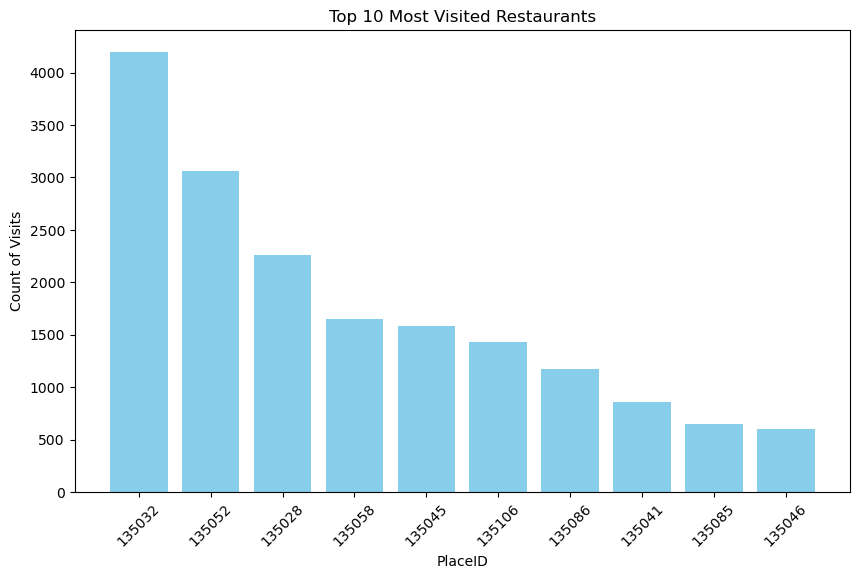

In [57]:
# Assuming `rating_data` is the merged dataset from the previous steps

# Step 1: Count the occurrences of each placeID
place_counts = rating_data['placeID'].value_counts().reset_index()
place_counts.columns = ['placeID', 'count']

# Step 2: Select the top 10 most visited placeIDs
top_10_places = place_counts.head(10)

# Step 3: Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_places['placeID'].astype(str), top_10_places['count'], color='skyblue')
plt.xlabel('PlaceID')
plt.ylabel('Count of Visits')
plt.title('Top 10 Most Visited Restaurants')
plt.xticks(rotation=45)
plt.show()


# Visit Patterns of the Top 10 Most Visited Restaurants - By Days of the Week & Hours of Operation

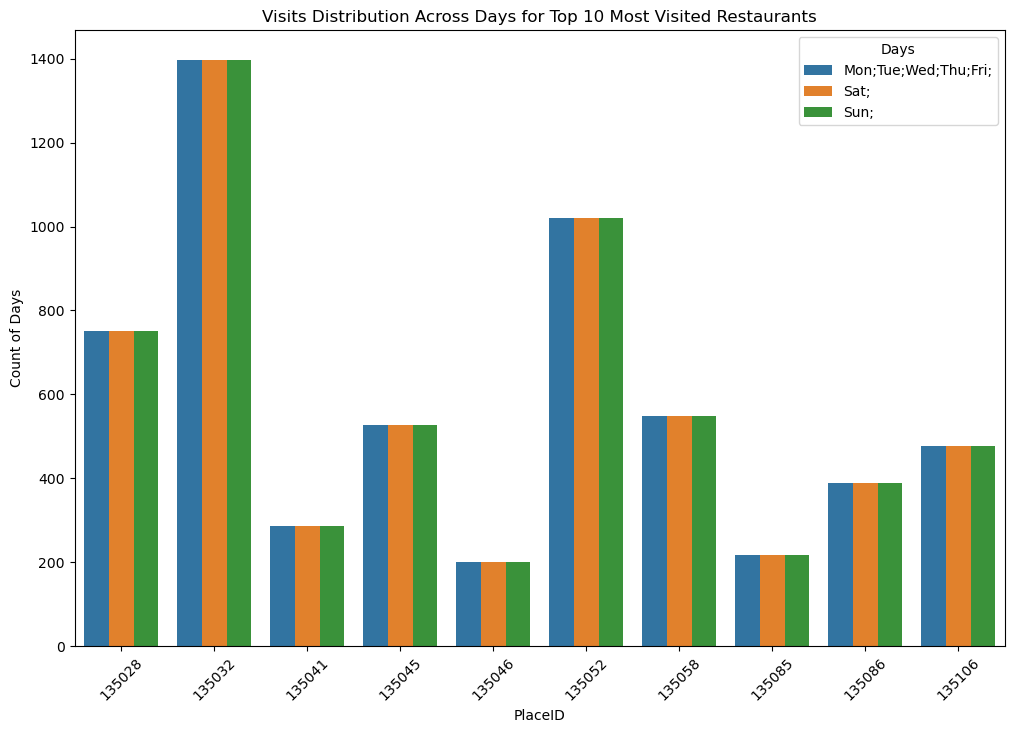

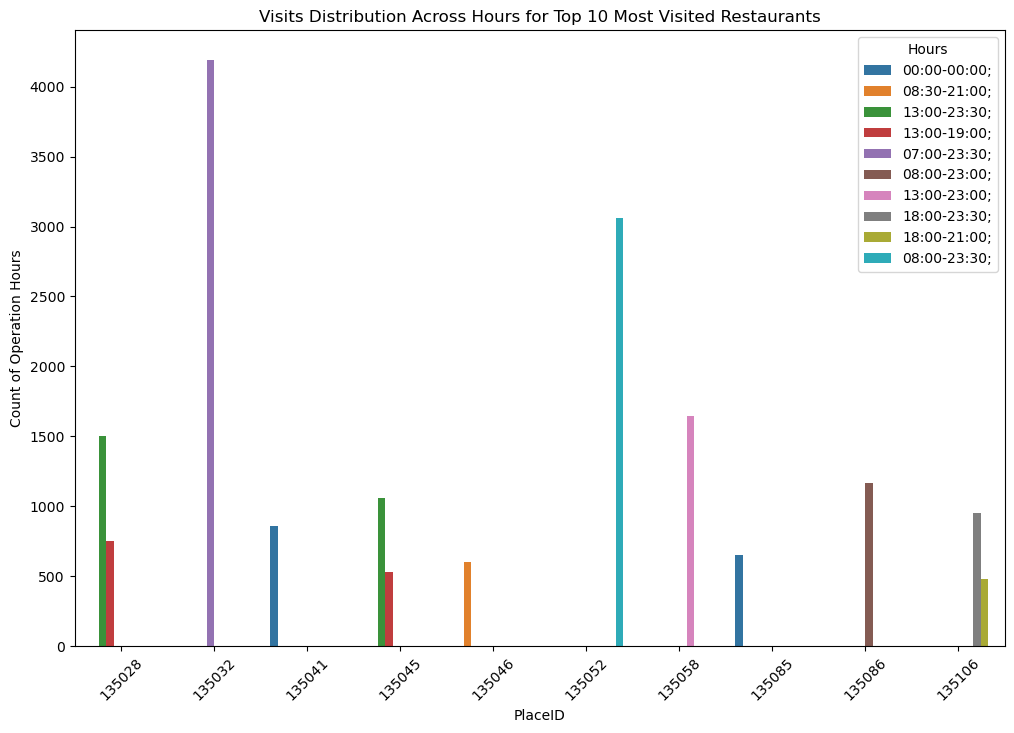

In [67]:
# Step 1: Count the occurrences of each placeID
place_counts = rating_data['placeID'].value_counts().reset_index()
place_counts.columns = ['placeID', 'count']

# Step 2: Select the top 10 most visited placeIDs
top_10_places = place_counts.head(10)

# Step 3: Filter the rating_data to include only the top 10 placeIDs
top_10_data = rating_data[rating_data['placeID'].isin(top_10_places['placeID'])]

# Step 4: Merge with hours and days data if available
# Assuming 'days' and 'hours' columns are in the dataset
# If not, these steps will need to be adjusted to fit your data structure

# Example merge operation (assuming 'days' and 'hours' columns are present)
#top_10_data = top_10_data.merge(dfs['chefmozhours4'], on='placeID', how='left')

# Step 5: Plot visit counts against days
plt.figure(figsize=(12, 8))
sns.countplot(data=top_10_data, x='placeID', hue='days')
plt.xlabel('PlaceID')
plt.ylabel('Count of Days')
plt.title('Visits Distribution Across Days for Top 10 Most Visited Restaurants')
plt.xticks(rotation=45)
plt.legend(title='Days')
plt.show()

# Step 6: Plot visit counts against hours
plt.figure(figsize=(12, 8))
sns.countplot(data=top_10_data, x='placeID', hue='hours')
plt.xlabel('PlaceID')
plt.ylabel('Count of Operation Hours')
plt.title('Visits Distribution Across Hours for Top 10 Most Visited Restaurants')
plt.xticks(rotation=45)
plt.legend(title='Hours')
plt.show()


# Merging Cuisine Types to the Popular Restaurants

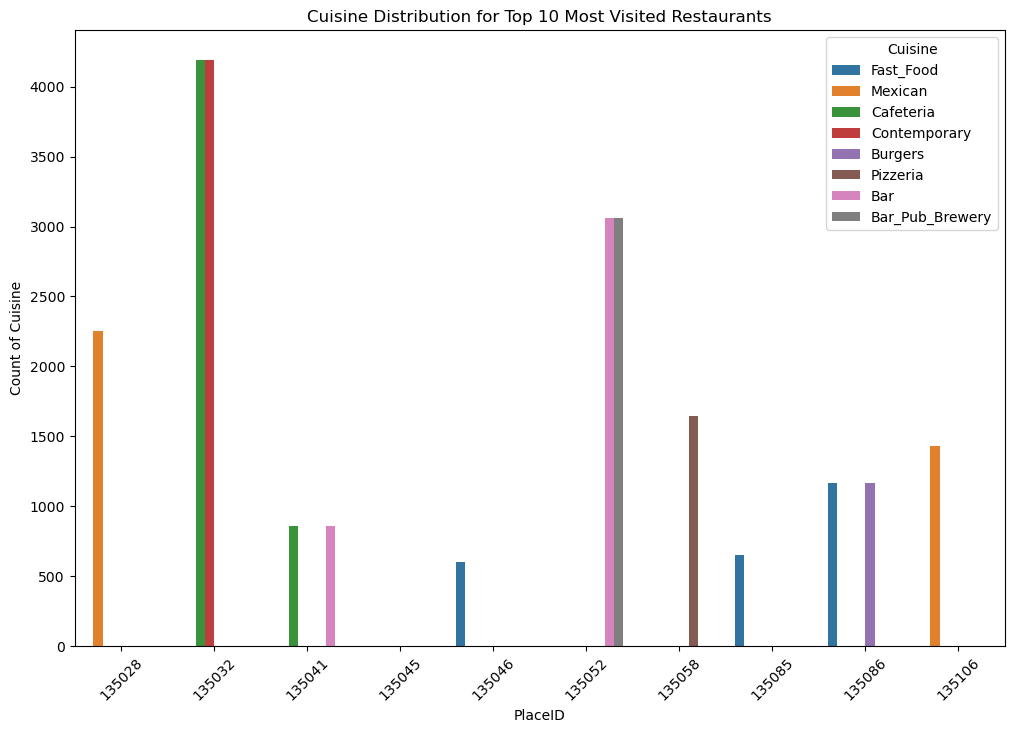

In [68]:
# Assuming 'Rcuisine' column is in the dataset
top_10_data_with_cuisine = top_10_data.merge(dfs['chefmozcuisine'], on='placeID', how='left')

# Plot the distribution of cuisines for the top 10 restaurants
plt.figure(figsize=(12, 8))
sns.countplot(data=top_10_data_with_cuisine, x='placeID', hue='Rcuisine')
plt.xlabel('PlaceID')
plt.ylabel('Count of Cuisine')
plt.title('Cuisine Distribution for Top 10 Most Visited Restaurants')
plt.xticks(rotation=45)
plt.legend(title='Cuisine')
plt.show()

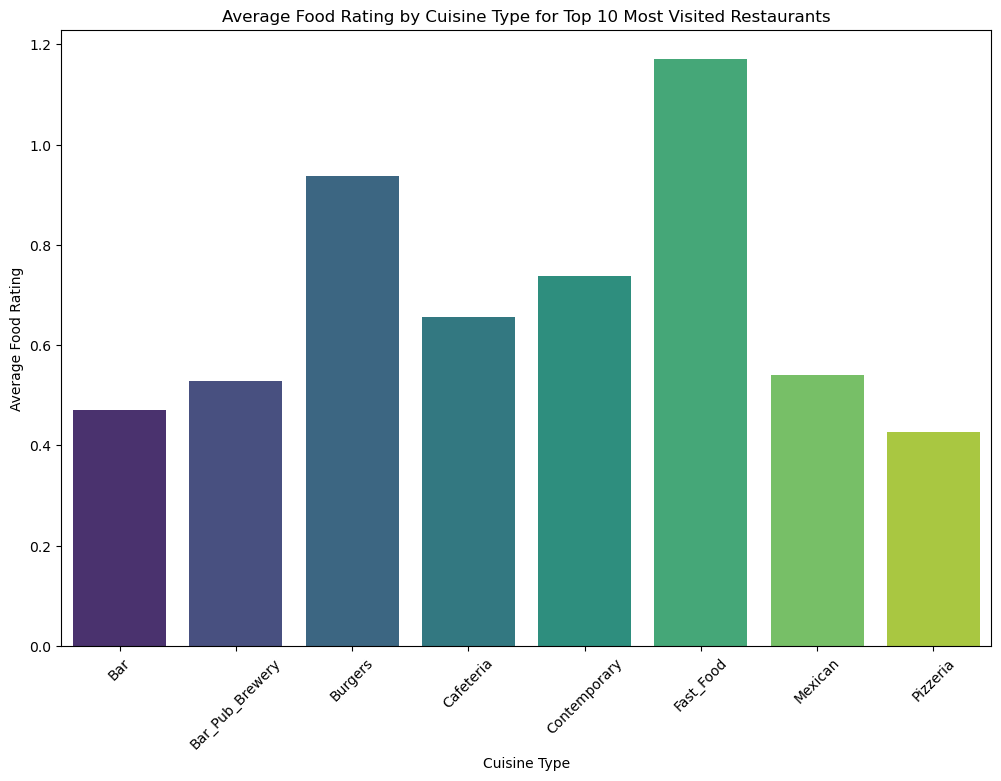

In [69]:
# Calculate the average food_rating for each cuisine type
average_food_rating_by_cuisine = top_10_data_with_cuisine.groupby('Rcuisine')['food_rating'].mean().reset_index()

# Plot the correlation between Rcuisine and food_rating
plt.figure(figsize=(12, 8))
sns.barplot(data=average_food_rating_by_cuisine, x='Rcuisine', y='food_rating', palette='viridis')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Food Rating')
plt.title('Average Food Rating by Cuisine Type for Top 10 Most Visited Restaurants')
plt.xticks(rotation=45)
plt.show()


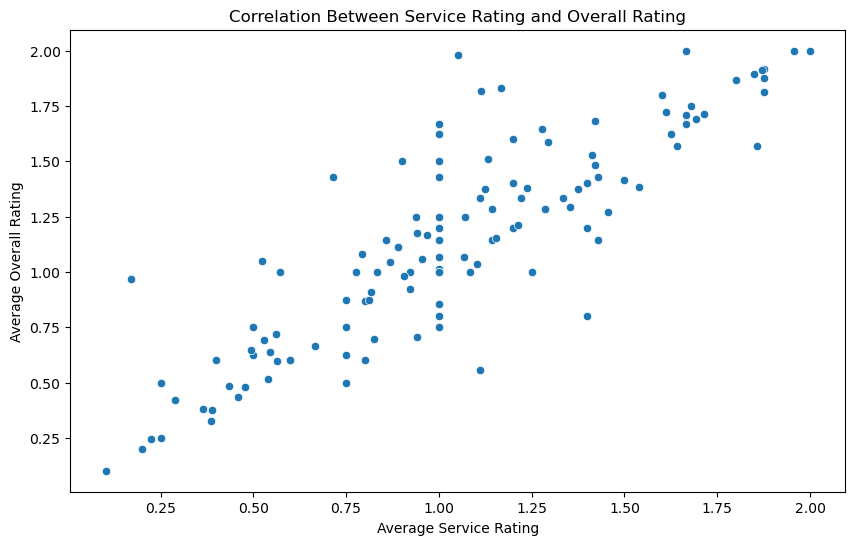

In [70]:
# Step 1: Calculate the average service rating for each restaurant
average_service_rating_by_place = rating_data.groupby('placeID')['service_rating'].mean().reset_index()

# Step 2: Calculate the average overall experience rating for each restaurant
average_overall_rating_by_place = rating_data.groupby('placeID')['rating'].mean().reset_index()

# Step 3: Merge the two DataFrames on 'placeID'
average_ratings_by_place = pd.merge(average_service_rating_by_place, average_overall_rating_by_place, on='placeID', suffixes=('_service', '_overall'))

# Step 4: Plot the correlation between service rating and overall rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=average_ratings_by_place, x='service_rating', y='rating')
plt.xlabel('Average Service Rating')
plt.ylabel('Average Overall Rating')
plt.title('Correlation Between Service Rating and Overall Rating')
plt.show()


# Step 5 - Building & Evaluating a Predicitve Model

Mean Squared Error: 0.06625980511962179
R^2 Score: 0.5072663653346267


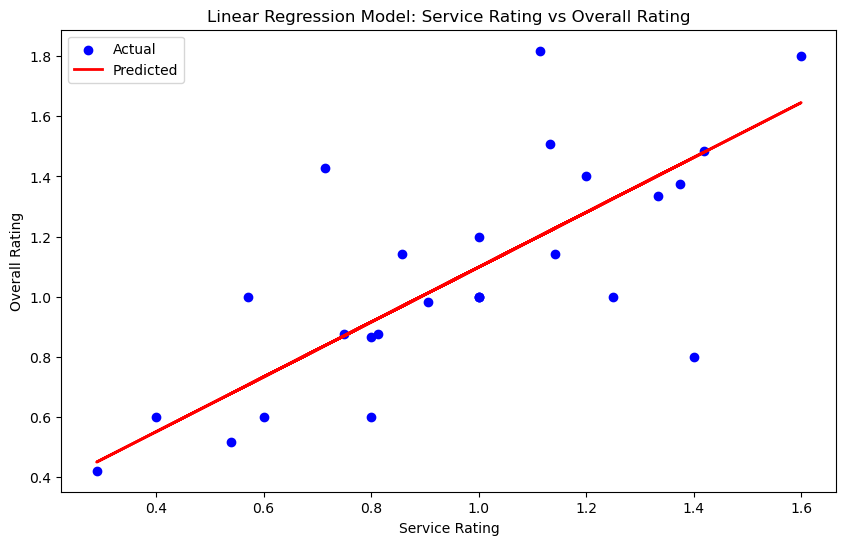

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare the data
X = average_ratings_by_place[['service_rating']]  # Independent variable (service rating)
y = average_ratings_by_place['rating']            # Dependent variable (overall rating)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Step 6: Visualize the model
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Service Rating')
plt.ylabel('Overall Rating')
plt.title('Linear Regression Model: Service Rating vs Overall Rating')
plt.legend()
plt.show()
